In [5]:
### Import all the libraries ###
import requests 
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import wordnet
#We use the wordnet to find the synonym of the word. If the synonym are the same for some words, then there is a high chance that the text is talking about this subject. The synonyms of a word are returned as a nested list of synonyms of the different senses of the input word in the given language, since these different senses are not mutual synonyms#
nltk.download('wordnet')
#We use the omw package with the stopswords#
nltk.download('omw-1.4')
################################

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nelso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nelso\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
####################################
### Scrapping the wikipedia page ###
####################################


####################################
#### Scrapp the user main page #####
####################################
def UserPage(name):
    #URL of the wikipedia user main page
    url = 'https://fr.wikipedia.org/wiki/Utilisateur:'+name
    #request to get the HTML code
    page = requests.get(url)
    #create the object Beautiful Soup
    soup = BeautifulSoup(page.text, 'html.parser')
    #find the content of the page
    content = soup.find(id="mw-content-text")
    #extract text
    textUserPage = content.get_text()
    #return the text
    return(textUserPage)
##################################


##### Scrapp the user discussion page #####
def UserDiscussion(name):
    #URL of the wikipedia user discussion
    url = 'https://fr.wikipedia.org/wiki/Discussion_utilisateur:'+name
    #request to get the HTML code
    page = requests.get(url)
    #create the object Beautiful Soup
    soup = BeautifulSoup(page.text, 'html.parser')
    #find the content of the page
    content = soup.find(id="mw-content-text")
    #extract text
    textUserDiscussion = content.get_text()
    #return the text
    return(textUserDiscussion)
########################################

In [7]:
###Clean the text data###

##### Fusion all the pages #####
def fusionner_texte(texte1,texte2):
    return texte1 + texte2
#################################

#####Remove the unusefull data from the text, mainly the () and []#####
def clean_text(text):
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\b(\w*wiki\w*)\b', '', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(\w*accueil\w*)\b', '', text, flags=re.IGNORECASE)
    return re.sub(r'\[.*?\]', '', text)
#################################

In [8]:
###Get the stopwords to delete the useless words###
nltk.download('stopwords')
#Stopwords in french#
french_stopwords = set(stopwords.words("french"))
#Stopwords in english#
english_stopwords = set(stopwords.words("english"))
stopwords = french_stopwords | english_stopwords
###################################################

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nelso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
### Using the tf_idf function to get the most used words with the stopswords deleted from it ###
# tf-idf = term frequency (number of time terms appearing in the text) * inverse document frequency #
def tf_idf(text):
    #converts a collection of raw documents into a matrix of TF-IDF features#
    tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)
    tfidf_matrix = tfidf_vectorizer.fit_transform([text])
    feature_names = tfidf_vectorizer.get_feature_names()
    dense = tfidf_matrix.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist, columns=feature_names)
    return df
############################################################

In [10]:
### Call all the function and ask wich user whe should check ###
name = input("Entrez le nom de la page wikipedia: ")
textemerged = fusionner_texte(UserPage(name),UserDiscussion(name))
texteclean = clean_text(textemerged)
tfidf = tf_idf(texteclean)
print(tfidf)
################################################################

Entrez le nom de la page wikipedia: Eric
   affichés      afin      aide  allemand     allez    ancien   anglais  \
0  0.043274  0.043274  0.173097  0.043274  0.043274  0.043274  0.043274   

   anglaise  annonces   appelle  ...     vivre     voilà       vue  \
0  0.043274  0.043274  0.043274  ...  0.043274  0.043274  0.043274   

   vérifiabilité    woohoo  échapper  éditorial  également   éréales  \
0       0.043274  0.043274  0.043274   0.043274   0.043274  0.086548   

   événements  
0    0.043274  

[1 rows x 232 columns]


C:\Users\nelso\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


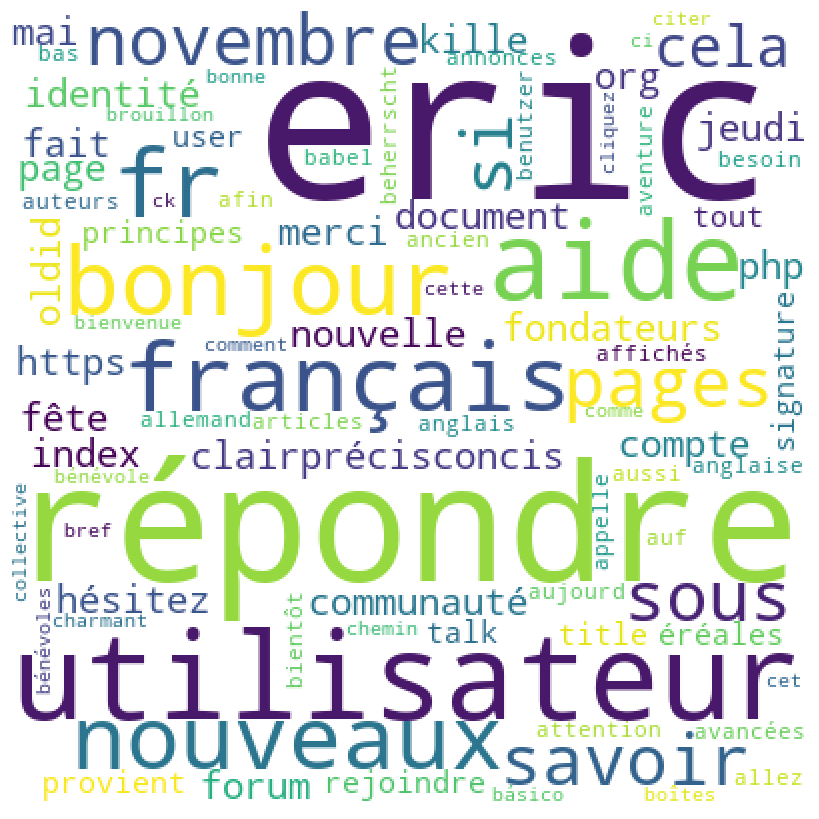

In [12]:
# Transform the dataframe into a dictionary to store the terms and their occurrences
dictionnaire = {k: v[0] for k, v in tfidf.to_dict().items()}

# Create a word cloud
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(dictionnaire)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [13]:
#This code is used to sort a dictionary by its values in descending order and then return the top 5 items as a list of tuples.
def Sorted_dict(d): 
    # Getting the max value of the dict
    max_value = max(d.values())
    # And sorting the dict to see the 5 more accurate
    sorted_dict = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
    return sorted_dict

sorted_dict = Sorted_dict(dictionnaire)
top5 = list(sorted_dict.items())[0:5]
print(top5)

[('eric', 0.34619385792633234), ('répondre', 0.25964539344474924), ('utilisateur', 0.21637116120395772), ('aide', 0.17309692896316617), ('bonjour', 0.12982269672237462)]


In [15]:
### Function to find the synonyms of a word ###
def find_synonyms(word):
    # Create a list for the synonyms
    synonyms = []
    # I use the wornet lib to find the synonym of a word
    for x in wordnet.synsets(word):
        for i in x.lemmas():
            synonyms.append(i.name())
    return set(synonyms)

# Print all the synonym of the tf-idf words
for word, value in dictionnaire.items():
    print(f"Word: {word} , Value: {value} , Synonyms: {find_synonyms(word)}")

Word: affichés , Value: 0.04327423224079154 , Synonyms: set()
Word: afin , Value: 0.04327423224079154 , Synonyms: set()
Word: aide , Value: 0.17309692896316617 , Synonyms: {'aide', 'auxiliary', 'adjutant', 'aide-de-camp'}
Word: allemand , Value: 0.04327423224079154 , Synonyms: set()
Word: allez , Value: 0.04327423224079154 , Synonyms: set()
Word: ancien , Value: 0.04327423224079154 , Synonyms: set()
Word: anglais , Value: 0.04327423224079154 , Synonyms: set()
Word: anglaise , Value: 0.04327423224079154 , Synonyms: set()
Word: annonces , Value: 0.04327423224079154 , Synonyms: set()
Word: appelle , Value: 0.04327423224079154 , Synonyms: set()
Word: articles , Value: 0.04327423224079154 , Synonyms: {'article', 'clause'}
Word: attention , Value: 0.04327423224079154 , Synonyms: {'tending', 'attention', 'aid', 'care', 'attending'}
Word: auf , Value: 0.04327423224079154 , Synonyms: set()
Word: aujourd , Value: 0.04327423224079154 , Synonyms: set()
Word: aussi , Value: 0.04327423224079154 , Sy

In [20]:
# We list the occurencies of synonym with their values
word_counts = {}
# We count them
for word, value in dictionnaire.items():
        for s in find_synonyms(word):
            words = s.split()
            for word in words:
                if word in word_counts:
                    word_counts[word] += 1
                else:
                    word_counts[word] = 1
                    
print(word_counts)

{'aide': 1, 'auxiliary': 1, 'adjutant': 1, 'aide-de-camp': 1, 'article': 1, 'clause': 1, 'tending': 1, 'attention': 1, 'aid': 1, 'care': 1, 'attending': 1, 'auteur': 1, 'Tower_of_Babel': 1, 'babel': 1, 'Babel': 1, 'Ba': 1, 'Bachelor_of_Arts': 1, 'Artium_Baccalaurens': 1, 'atomic_number_56': 1, 'barium': 1, 'AB': 1, 'BA': 1, 'Ci': 1, '101': 1, 'one_hundred_one': 1, 'curie': 1, 'ci': 1, 'hundred_and_one': 1, 'corporate': 1, 'collective': 1, 'commentary': 1, 'gossip': 1, 'comment': 1, 'input': 1, 'scuttlebutt': 1, 'annotate': 1, 'gloss': 1, 'remark': 1, 'notice': 1, 'point_out': 1, 'coercion': 1, 'irresistible_impulse': 1, 'obsession': 1, 'compulsion': 1, 'con': 1, 'learn': 1, 'scam': 1, 'gip': 1, 'hustle': 1, 'diddle': 1, 'bunco': 1, 'swindle': 1, 'flimflam': 1, 'yard_bird': 1, 'convict': 1, 'bunko_game': 1, 'bunko': 1, 'memorize': 1, 'inmate': 1, 'con_game': 1, 'hornswoggle': 1, 'bunco_game': 1, 'mulct': 1, 'confidence_game': 1, 'victimize': 1, 'nobble': 1, 'rook': 1, 'short-change': 1,

In [21]:
sorted_dict = Sorted_dict(word_counts)
top5 = list(sorted_dict.items())[0:5]
print(top5)

[('place', 2), ('subject_matter', 2), ('substance', 2), ('content', 2), ('message', 2)]
